<a href="https://colab.research.google.com/github/lonen8188/PythonAI/blob/9-1.SequentialData/hg_09_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 순차 데이터 (Sequential Data)는 텍스트나 시계열 데이터(time series data : 일정 시간 간격으로 기록한 데이터) 와 같이
# 순서에 의미가 있는 데이터를 말함

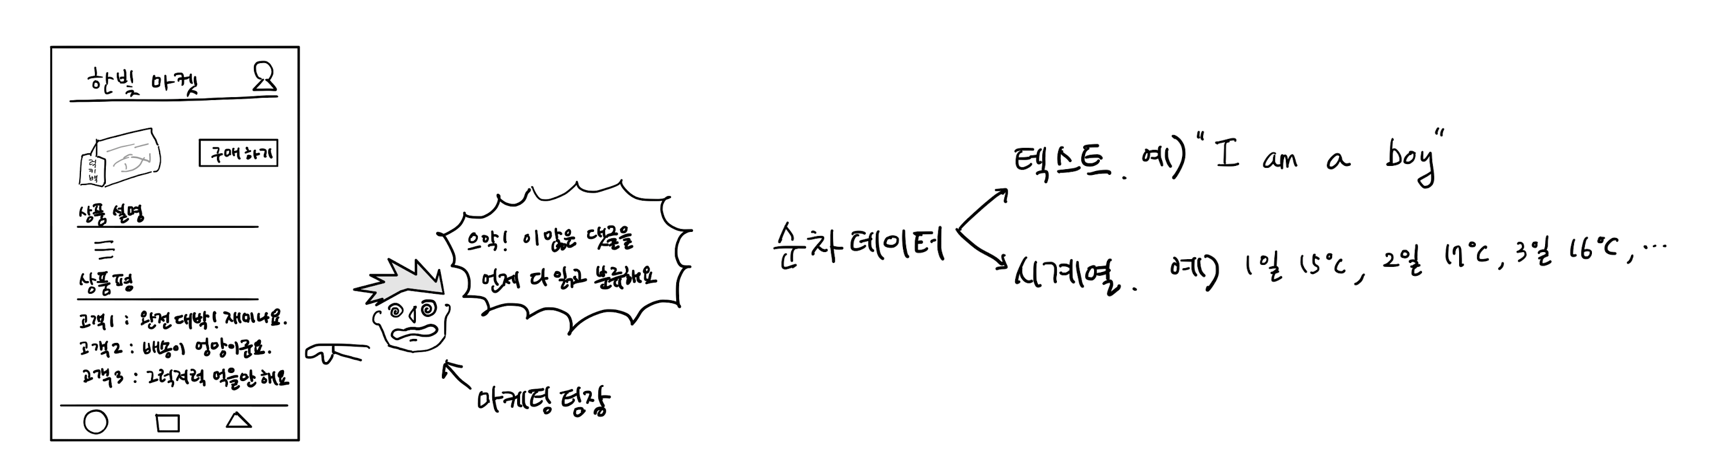

In [1]:
# 지금까지는 순서와 상관이 없었으며 샘플을 랜덤하게 섞은 다음 훈련세트와 검증세트로 나누어 훈련하면 결과가 더 좋았음
# 생선 데이터나 패션 데이터도 어떤 샘플이 먼저 주입되어도 모델의 학습에 큰 영향이 없다.

# 지금 학습하려는 것은 댓글, 즉 텍스트 데이터는 단어의 순서가 중요한 순차 데이터임
# 이런 데이터는 순서를 유지하며 신경망에 주입을 해야 한다. (단어의 순서를 마구 섞어 주입하면 안됨)
# 따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요함
# 예를 들어 "별로지만 추천해요" -> "추천해요"가 입력될때 "별로지만" 을 기억하고 있어야 이 댓글을 파악할 수 있음 -> 무조건 긍정적이지 않음

In [ ]:
# 완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. (피드포워드 신경망에는 메모리가 없다)
# 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다.
# 피드포워드(순방향) 신경망 : 입력 데이터의 흐름이 앞으로만 전달되는 신경망(FNN: feed-forward neural networks) -> 완전연결 신경망, 합성곱 신경망
# 신경망이 이전에 처리했던 샘플을 다른 샘플로 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로 전달되어서는 안됨
# 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있다 -> 순환신경망

In [ ]:
# 순환신경망(Recurrent Neural Network, RNN)은 일반적으로 완전 연결 신경망과 거의 비슷함
# 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나망 추가하면 됨
# 은닉층에 있는 붉은 고리가 핵심

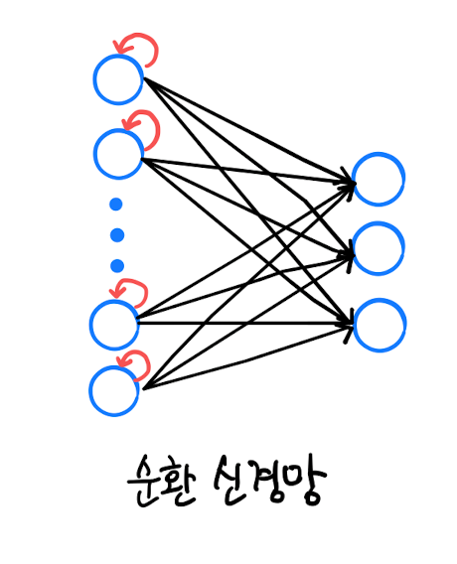

In [ ]:
# 뉴런의 출력이 다시 자기 자신으로 전달 됨
# 즉 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용함
# 아래 그림처럼 A, B, C 3개의 샘플을 처리하는 순환 신경망 뉴런이 있다.
# O는 출력된 결과로 첫 번째 샘플을 처리하고 난 출력 O_A가 다시 뉴런으로 들어감 -> A에 대한 정보가 들어 있음
# B를 처리할 때 앞에 A를 사용해 만든 출력 0_A를 함께 사용함
# 마지막까지 돌리면 O_C는 A, B, C의 정보가 담겨 있다.
# 물론 O_C는 A에 대한 정보보다는 B에 대한 정보가 더 많이 들어 있다.

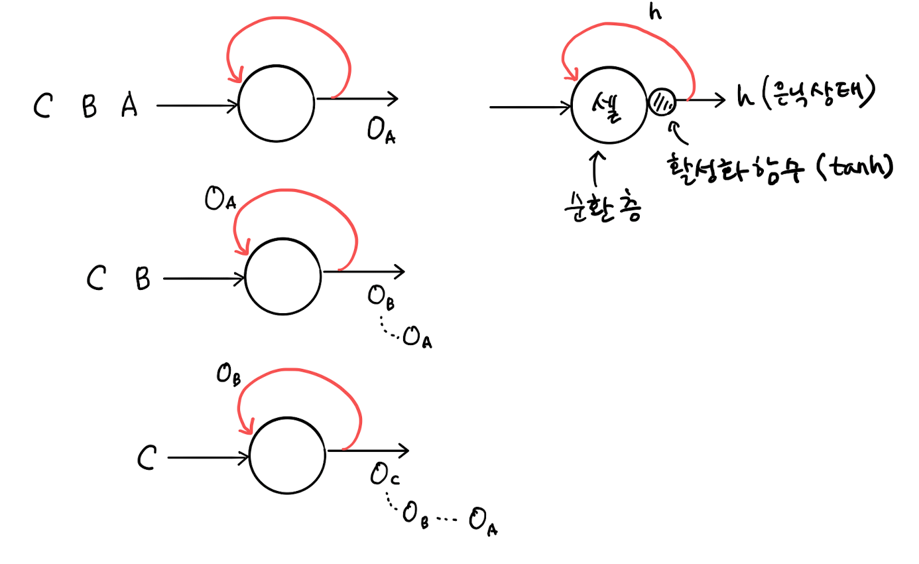

In [2]:
# 그래서 순환 신경망에서는 이전 샘플에 대한 기억을 가지고 있다. 가 됨!
# 이렇게 샘플을 처리하는 한 단계를 타임스탭(timestep)이라고 함

In [ ]:
# 순환 신경망에서는 특별히 층을 셀(cell)이라고 함
# 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현함
# 셀의 출력을 은닉 상태(hidden state)라고 함

# 합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있음. 하지만 기본 구조는 같다.
# 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보낸다.
# 달라지는 것은 층의 출력(즉 은닉 상태)을다음 타임 스텝에 재사용 한다는 것!!!

# 일반 적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트(hyperbolic tangent, tanh : 텐h )함수가 많이 사용됨
# tanh 함수도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 한다. (차이점 : -1 ~ 1 사이의 범위를 가짐)

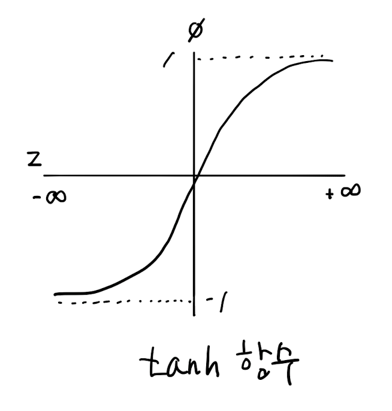

In [ ]:
# 다른 신경망 함수와 마찬가지로 순환 신경망 그램에도 번거로움을 피하기 위해 활성화 함수를 표시하지 않는 경우가 많다.
# 하지만 순환 신경망에도 활성화 함수가 반드시 필요하다는 것은 기억할 것

# 합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱한다. 순환 신경망에서도 동일 함
# 다만 순환 신경망의 뉴런은 가중치가 하나 더 있다. 바로 이전 타임스템의 은닉 상태에 곱해지는 가중치임
# 셀은 입력과 이전 타임스템의 은닉 상태를 사용하여 현재 타입스텝의 은닉 상태를 만듬

# 아래 그림에서 2개의 가중치를 셀 안에 구분해서 표시를 하였음
# W_x는 입력에 곱해지는 가중치이고 W_h는 이전 타입스텝의 은닉 상태에 곱해지는 가중치임
# 피드포워드 신경망과 마찬가지로 뉴런 마다 하나의 절편이 포함됨

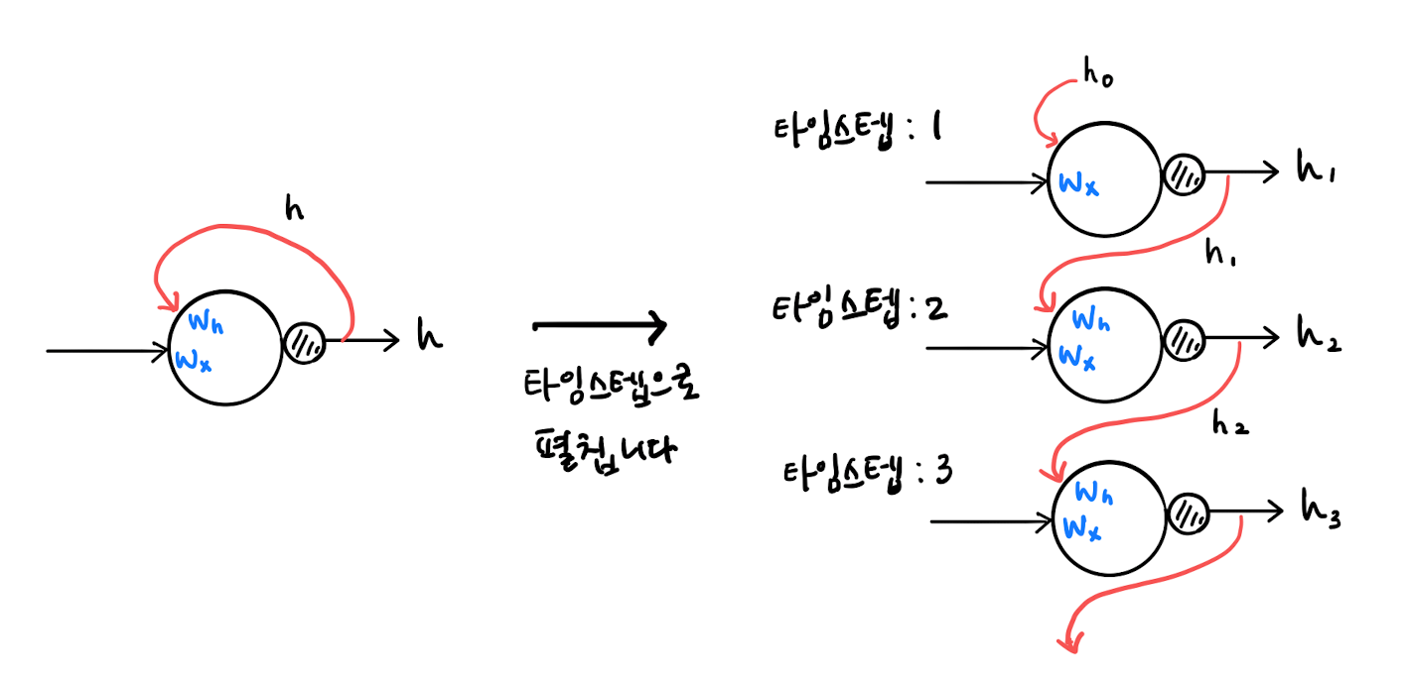

In [ ]:
# 셀의 출력(은닉 상태)이 다음 타임스텝에 재사용되기 때문에 타임스템으로 셀을 나누어 그릴 수 있다.
# 위 오른쪽 그림을 셀을 타임스텝으로 펼치는 과정임
# 타임스텝 1에서 셀의 출력 h_1이 타임스텝 2의 셀로 주입되고 W_h와 곱해진다.
# 타임스텝 2에서 셀의 출력 h_2이 타임스텝 3의 셀로 주입되고 W_h와 곱해진다. -> 타입스텝의 가중치는 W_h 하나임
# W_h는 타임스텝에 따라 변화되는 뉴런의 출력을 학습한다. -> 순차 데이터를 다루는데 필요

# 그럼 맨 처음 타임스텝 1에서 사용되는 이전 은닉 상태 h_0은 없기때문에 0으로 초기화하여 구한다.

In [ ]:
# 셀의 가중치와 입출력

# 순환 신경망의 셀에서 필요한 가중치 크기를 계산해 보자. 복잡한 모델을 배울 수록 가중치 개수를 계산해 보면 잘 이해 될 수 있다.
# 예를 들어 아래 그림처럼 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 해보자.
# W_x의 크기를 구해보면, 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 W_x의 크기는 4*3 = 12가 됨 (완전 연결 신경망의 입력층과 은닉층의 연결과 같다.)
# 그럼 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 W_h의 크기는 아래 오른쪽 그림을 참고 하자.

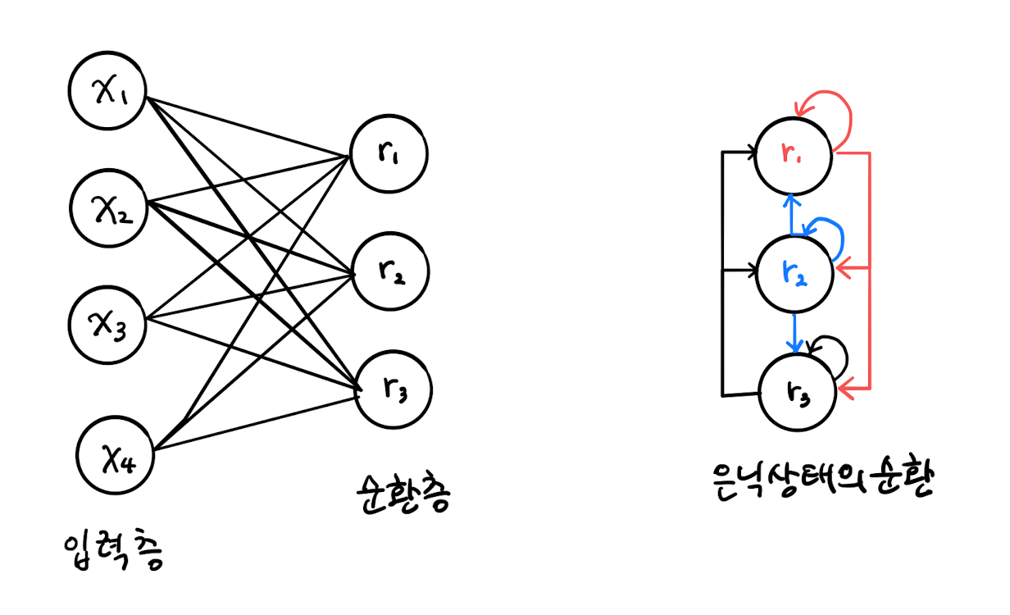

In [ ]:
# 순환층에 있는 첫 번째 뉴런(r_1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달 됨
# 위에 오른쪽 그림에 빨간 부분을 참고 (즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결됨)

# 두 번째 뉴런의 은닉 상태도 마찬가지로 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달되고(파란화살표)
# 세 번째 뉴런의 은닉상태도 동일함(검은화살표), 따라서 이 순환층에서 은닉 상태를 위한 가중치 w_h (9 = 3 * 3)

In [ ]:
# 모델 파라미터 계산 : 가중치에 절편을 더함 ( w_x + w_h + 절편)
# 각 뉴런마다 하나의 절편이 있다. 따라서 이 순환층은 모두 12 + 9 + 3 = 24 의 모델 파라미터를 가지고 있다.

In [ ]:
# 순환층의 입력과 출력에 대해 알아보자.

# 합성곱 층의 입력은 전형적으로 하나의 샘플이 3개의 차원을 가짐 (너비, 높이, 채널)
# 입력이 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널(깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지됨

# 순환층은 일반적으로 샘플마다 2개의 차원을 가짐, 보통 하나의 샘플을 하나의 스퀀스라고 말함
# 스퀀스 안에는 여러 개의 아이템들이 들어 있는데 여기에서 시퀀스의 길이가 바로 타임스텝 길이가 됨

# 샘플에 I am a boy 라는 문장이 들어 있다고 가정 하고 분석 해보자.
# 이 샘플은 4개의 단어로 이루어 짐, 각 단어를 3개의 어떤 숫자로 표현한다고 해보면???

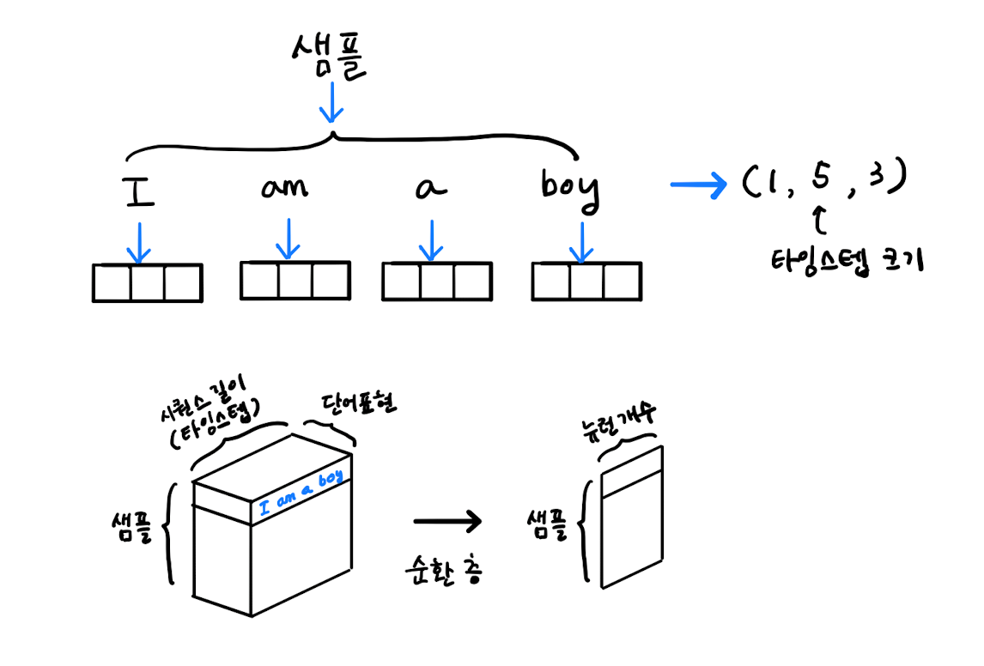

In [ ]:
# 이런 순환 층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력됨
# 하나의 샘플은 시퀀스 길이(여기선 단어 개수)와 단어 표현의 2차원 배열이다.
# 순환층을 통과하면 1차원 배열로 바뀐다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정됨

# 앞에서 셀의 출력을 설명할 때 참고해야 할 상태가 있다. -> 앞에서는 셀이 모든 타임스텝에서 출력을 만든 것 처럼 표현했다.
# 하지만 사실 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

# 아래 그림에서 이런 특징을 그림으로 표현하기 위해 셀의 출력을 점선으로 표현함
# 또 마지막 타임스텝의 은닉 상태임을 나타내기 위해 아랫첨자 f를 사용함

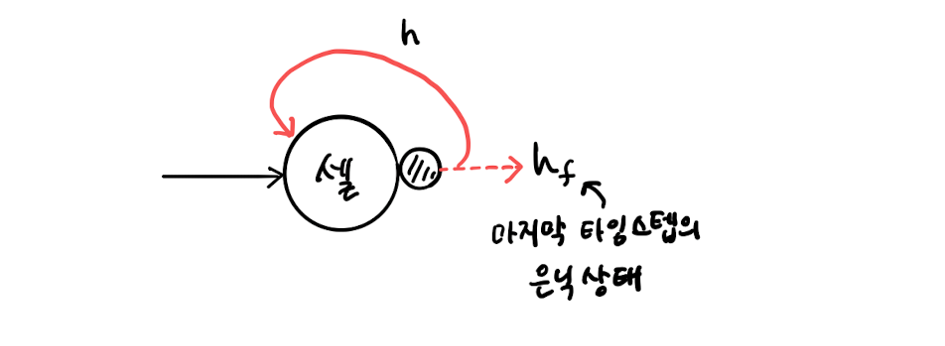

In [ ]:
# 이는 마치 입력된 스퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달 하는 것 처럼 봄
# 이제 순환 신경망이 정보를 기억하는 메모리를 가진다고 표현을 하는 것임 (순환 신경망이 순차 데이터의 최적화 됨)
# 순환 신경망도 완전 연결 신경망이나 합성곱 신경망 처럼 여러 개의 층을 쌓을 수 있다.
# 순환층을 여러 개 쌓았을 때는 셀의 출력은 어떻게 달라질지 알아야 한다.
# 셀의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열이어야 한다.

# 따라서 첫 번째 셀이 마지막 타임스텝의 은닉상태만 출력해서는 안됨
# 이런 경우 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉 상태를 출력한다.
# 아래 그림은 2개의 순환층을 쌓은 경우임

# 첫번째 셀은 모든 타임스텝의 은닉 상태를 출력하고, 두번째 셀은 마지막 타임스텝의 은닉상태만 출력한다.

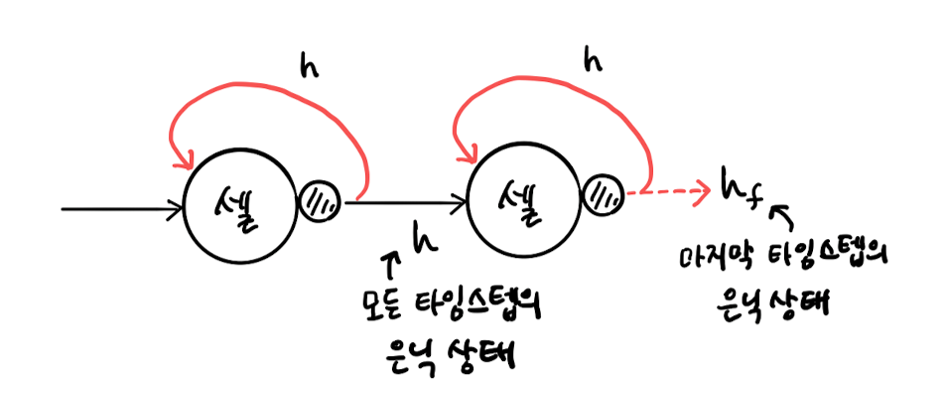

In [ ]:
# 마지막 출력층의 구성은 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다.
# 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용함
# 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용함

# 합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요없음
# 셀의 출력을 그대로 밀집층에 사용할 수 있다.

# 예를 들어 다중 분류 문제에서 입력 샘플의 크기가 (20, 100)일 경우 하나의 순환층을 사용하는 순환 신경망 구조는 아래그림을 참고 한다.

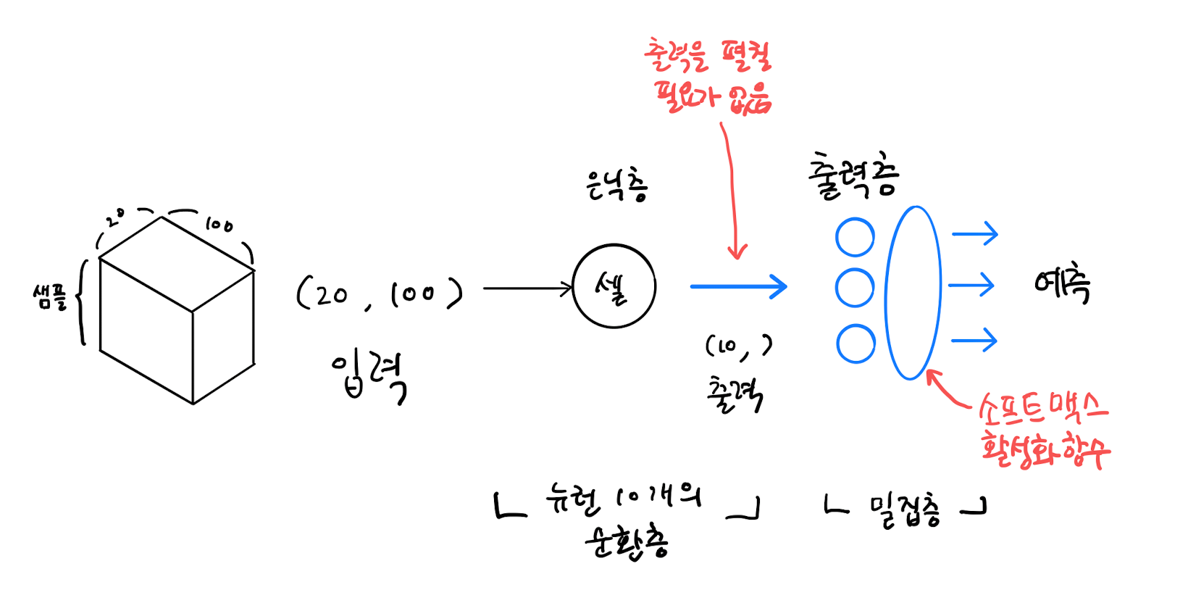

In [ ]:
# 이 예에서 샘플은 20개의 타임스텝으로 이루어져 있음, 또 각 타임스텝은 100개의 표현 또는 특성으로 이루어 져 있음
# 이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉 상태만 출력됨
# 이 은닉 상태의 크기가 셀에 있는 뉴런의 개수가 되므로 (10, )이 된다.

# 샘플마다 셀이 1차원 배열을 출력하기 때문에 합성곱 신경망 처럼 Flatten 클래스로 펼칠 필요 없이 바로 출력층에 연결 함
# 위 그림은 3개의 클래스를 가진 다중 분류일 경우를 위해 출력층에 3개의 뉴런과 소프트맥스 활성 함수를 사용하는 예제임